# Import Modules #
In a python environment, you need to import the modules you are working with at the beginning of a file. There are many commonly used modules that come pre-installed with your Python manager; however, there are so many modules that if they were all pre-loaded, it would take a very long time to run your code. If you need a module that isn’t already installed, you need to download and install it before you can use it. Once it is installed, you can import it into your current environment. The syntax for importing the Matplotlib module (previously described) would be as follows:


In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
import numpy as np

# Display Output #
There are many ways to display your data or the output of your code depending on what your project entails. The print function allows you to view the information stored in variables, or view the result of a function or mathematical operation (we will go more in depth on functions in a bit). The print function can be very useful when trying to debug (fix errors) your code or to visualize and understand different data types. Try the following print statement example:


In [2]:
strng = "Hello SARI friends!"
print(strng)

Hello SARI friends!


# Read in Vector Data #

Just as we had to import the relevant geospatial Python modules into our Python environment, we also have to import, or read in, the data. First we will see an example of reading in data from the GeoPandas database. Once we have GeoPandas imported into our Python environment, the command for reading in a data frame or a shapefile is gpd.read_file(). Remember that “gpd” is the nickname we gave the GeoPandas module. The read_file() method takes a file path as an argument. Normally, the file path would be a string object that points to the location of a shapefile on your local drive. Here, GeoPandas needs to first get the path of the file within its geodatabase before it can read it in. GeoPandas has a method for that as well. Try loading in a built-in data frame to your Python environment using the following code:


In [3]:
earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Explore Attribute Table #

Now we will look at some of the layers and attributes stored in the “earth” GeoDataFrame by using the “head()” method. This will print out the rows of each “Continent” GeoSeries and their attribute fields including names of countries and population estimates. After looking at the output of “head()” we will have a better understanding of the information we can display in our plots. Try the method below: 


In [4]:
earth.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


# Display a Vector #

For our plot, we will call the specific shapefile for Thailand from within the GeoDataFrame. Notice that each group of information has two columns. We will look for the name of the country by calling the “name” attribute of the earth GeoDataFrame that is set to “Thailand”, then set the output of that expression to a separate variable:


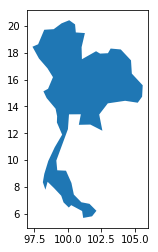

In [5]:
thailand =earth[(earth.name == 'Thailand')]
thailand.plot()
plt.show()


# Manipulate Display #

GeoPandas comes with many different methods for manipulating the display of a graph or plot based off of Matplotlib. Notice in the map of Thailand there are two axes. There are methods to change the labels, spacing, color, grid, title, background, you name it. The full documentation for Matplotlib can be found at https://matplotlib.org/users/. For now, we will just look at the general syntax for adjusting some simple aspects of the plot. If we wanted to add a title and labels to the x and y axes, we would call the methods “title()”, “xlabel()”, and “ylabel()”. We could also change the font size, type, color, and orientation. These methods are shown below:


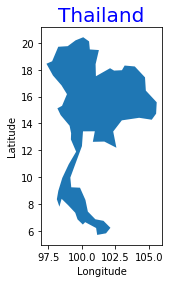

In [6]:
thailand.plot()
plt.title('Thailand', fontsize = 20, color = 'blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Now let’s create a “choropleth” map and plot the Asian countries in order of population. When we call the “plot()” method this time, we can choose the attribute column we would like to use as an argument. We can also choose the color scheme we want to display. A full list of Matplotlib color schemes can be found at https://matplotlib.org/examples/color/colormaps_reference.html. Now try the code below:


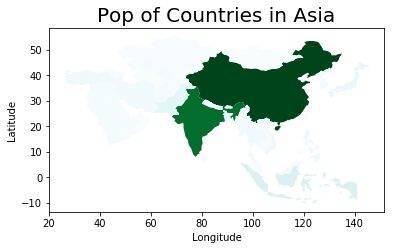

In [7]:
countries = earth[(earth.continent == 'Asia')]
countries.plot(column='pop_est', cmap='BuGn')
plt.title("Pop of Countries in Asia", fontsize = 20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



# Simple Geoprocessing #

We will demonstrate the buffer method on the shapefile of Thailand. Buffer simply takes the distance around the feature as an argument as shown below: 


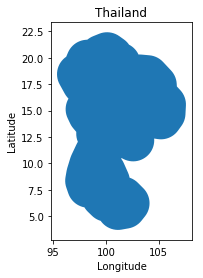

In [8]:
bufthai = thailand.buffer(2)
bufthai.plot()
plt.title('Thailand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Read in Local Data #
We can also read in shapefiles from your local drive. You need the .shp and the .shx files in the working directory in order to read in a shapefile. The .shx file contains information about the shapefile that the computer needs access to. In this case we will look at dams in the Lower Mekong Basin, and districts in Thailand. Let’s read in and plot the districts and the dams:


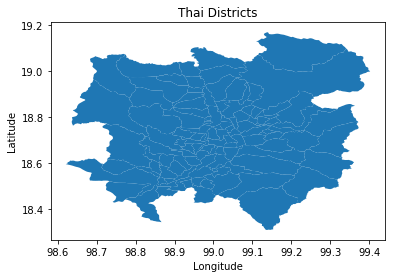

In [9]:
thai = gpd.read_file('../data/chiangmai_subdistrict.shp')
fig,ax = plt.subplots()
ax.set_title('Thai Districts')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
thai.plot(ax=ax)


# Read in Local Raster Data #

Just as there was a method to read in vector data, there is a Rasterio specific method for reading in raster data. The method “open()” takes a file path as an argument, and returns a raster dataset object. We need to double check that we have imported Rasterio into the environment, then we can open a raster using its local file name:


In [10]:
tif = rasterio.open('../data/LT05_L1TP_19900403_T1_ChiangMaiComposite.TIF')
print(tif.bounds)
print(tif.crs)
print(tif.meta)



BoundingBox(left=459918.3576624475, bottom=2024599.5066297203, right=542538.3576624475, top=2119429.5066297203)
CRS({'init': 'epsg:32647'})
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 65535.0, 'width': 2754, 'height': 3161, 'count': 7, 'crs': CRS({'init': 'epsg:32647'}), 'transform': (459918.3576624475, 30.0, 0.0, 2119429.5066297203, 0.0, -30.0), 'affine': Affine(30.0, 0.0, 459918.3576624475,
       0.0, -30.0, 2119429.5066297203)}


# Simple Calculations #
Rasterio allows you to perform raster calculations to the entire image all at once. In the next exercise, we will be calculating an index to find water in a raster image. Here we will look at how easy it can be to perform raster calculations:


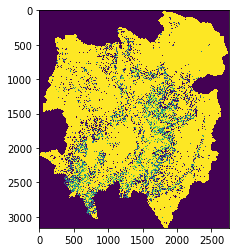

In [11]:
tif = rasterio.open('../data/LT05_L1TP_19900403_T1_ChiangMaiComposite.TIF')
new = tif.read(3)-tif.read(2)
plt.imshow(new,vmin=0,vmax=5)
plt.show()

# Manipulate Display #

If we want to display the raster we can use the Matplotlib class Pyplot that we have been working with. Remember that it is already loaded into our environment with the nickname “plt”. The method “imshow()” shows an image within a plot. The first argument is the raster dataset object to plot, and the second is the color scheme you want it displayed in. Because we opened the raster with “rasterio.open()”, the filepath is read in as a “Dataset reader” object. For this reason, you need to specify the band index you want displayed, which is done using the “read()” method:


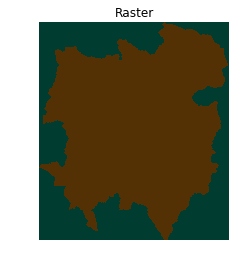

In [12]:
plt.imshow(tif.read(1),cmap="BrBG")
plt.axis('off')
plt.title('Raster')
plt.show()


# Save Raster Data #

If you want to save your vector dataset to your local machine, you need to open a new raster file in “write” mode. Recall earlier that we were working with a raster dataset in read mode, where we could only look at properties of the dataset, but not change the original dataset. Now we will create a new file in “write” mode, where we can change the data within the file. We need to define the file as a tiff, with all the same parameters as the image we were working with before:


In [13]:
image = tif.read(1)
meta = tif.meta
with rasterio.open('../data/output_test.tif','w',**meta) as dst:
    dst.set_crs(tif.crs)
    dst.write(new,1)
    dst.close()


/Users/kmarkert/anaconda3/lib/python3.6/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
